-------------------

<p style="font-family:'Candara'; font-size:35px; text-align: center; color: #272D2D"> Fake & Real News Classification (NLP)</p> 

-------------------

Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

------------

Importing Data

In [2]:
news = pd.read_csv("news.csv", index_col=False)
news.head()

,title,text,subject,date,news_integrity
0,FLASHBACK: KING OBAMA COMMUTES SENTENCES OF 22...,Just making room for Hillary President Obama t...,politics,31-Mar-15,False
1,APPLE’S CEO SAYS RELIGIOUS FREEDOM LAWS ARE ‘D...,The gay mafia has a new corporate Don. This i...,politics,31-Mar-15,False
2,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",politics,31-Mar-15,False
3,OH NO! GUESS WHO FUNDED THE SHRINE TO TED KENNEDY,Nothing like political cronyism to make your s...,politics,31-Mar-15,False
4,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...,Does anyone really think Hillary Clinton will ...,politics,31-Mar-15,False


Removing date column

In [3]:
news = news[['title', 'text', 'subject','news_integrity']]
news.head()

,title,text,subject,news_integrity
0,FLASHBACK: KING OBAMA COMMUTES SENTENCES OF 22...,Just making room for Hillary President Obama t...,politics,False
1,APPLE’S CEO SAYS RELIGIOUS FREEDOM LAWS ARE ‘D...,The gay mafia has a new corporate Don. This i...,politics,False
2,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",politics,False
3,OH NO! GUESS WHO FUNDED THE SHRINE TO TED KENNEDY,Nothing like political cronyism to make your s...,politics,False
4,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...,Does anyone really think Hillary Clinton will ...,politics,False


--------------

Exploratory Data Ana;ysis

In [4]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44867 entries, 0 to 44866
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           44867 non-null  object
 1   text            44867 non-null  object
 2   subject         44867 non-null  object
 3   news_integrity  44867 non-null  bool  
dtypes: bool(1), object(3)
memory usage: 1.1+ MB


In [5]:
news.describe()

,title,text,subject,news_integrity
count,44867,44867,44867,44867
unique,38712,38629,8,2
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,False
freq,14,627,11272,23450


Checking Missing Values

In [6]:
news.isnull().sum()

title             0
text              0
subject           0
news_integrity    0
dtype: int64

Text(0.5, 1.0, 'Missing Values')

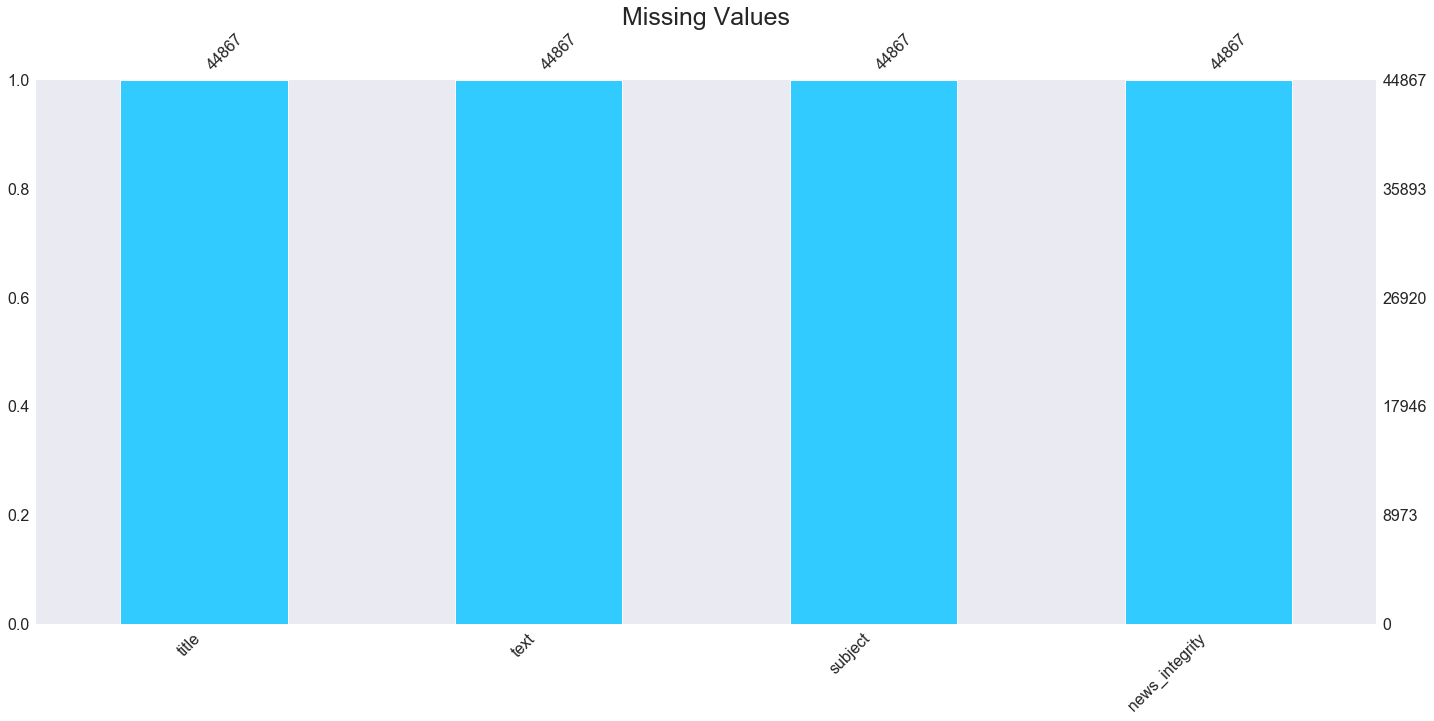

In [7]:
sns.set_style("dark")
msno.bar(news,color=("#32cbff"))
plt.title("Missing Values", fontsize = 25)

In [8]:
news.shape

(44867, 4)

In [9]:
news.news_integrity.value_counts()

False    23450
True     21417
Name: news_integrity, dtype: int64

news_integrity
False    23450
True     21417
Name: text, dtype: int64


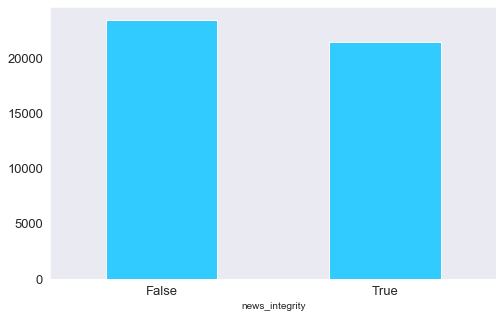

In [10]:
plt.figure(figsize=(8,5))
print(news.groupby(["news_integrity"])["text"].count())
news.groupby(["news_integrity"])["text"].count().plot(kind="bar",color=("#32cbff"))
plt.xticks(rotation=0, fontsize = 13)
plt.yticks(fontsize = 13)
plt.show()

In [11]:
news.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6833
left-news           4454
Government News     1568
US_News              775
Middle-east          770
Name: subject, dtype: int64

In [12]:
news[news['news_integrity'] == False].subject.value_counts()

News               9050
politics           6833
left-news          4454
Government News    1568
US_News             775
Middle-east         770
Name: subject, dtype: int64

In [13]:
news[news['news_integrity'] == True].subject.value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

---------------------

In [14]:
true_news = pd.DataFrame(news[news['news_integrity'] == True])
true_news = true_news.reset_index()
true_news=true_news.drop(['index'],axis=1)
true_news.head()

,title,text,subject,news_integrity
0,"In Republican state, Obama talks with worried ...","OMAHA, Neb. (Reuters) - President Barack Obama...",politicsNews,True
1,South Korea calls for 'bone-numbing' sanctions...,SEOUL (Reuters) - South Korea warned North Kor...,politicsNews,True
2,U.S. to expand refugee program for Central Ame...,WASHINGTON (Reuters) - The United States will ...,politicsNews,True
3,Bid to mine more coal on U.S. federal lands te...,WASHINGTON (Reuters) - President Barack Obama’...,politicsNews,True
4,"For Republican Rubio, a moment of truth in rac...","CHARLESTON, S.C. (Reuters) - Long viewed by th...",politicsNews,True


In [15]:
true_news.title.count()

21417

-------------------------

In [16]:
false_news = pd.DataFrame(news[news['news_integrity'] == False])
false_news = false_news.reset_index()
false_news = false_news.drop(['index'],axis=1)
false_news.head()

,title,text,subject,news_integrity
0,FLASHBACK: KING OBAMA COMMUTES SENTENCES OF 22...,Just making room for Hillary President Obama t...,politics,False
1,APPLE’S CEO SAYS RELIGIOUS FREEDOM LAWS ARE ‘D...,The gay mafia has a new corporate Don. This i...,politics,False
2,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",politics,False
3,OH NO! GUESS WHO FUNDED THE SHRINE TO TED KENNEDY,Nothing like political cronyism to make your s...,politics,False
4,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...,Does anyone really think Hillary Clinton will ...,politics,False


In [17]:
false_news.title.count()

23450

------------

Shuffling data to increase Randomness

In [18]:
from sklearn.utils import shuffle
news = shuffle(news)
news = news.reset_index(drop=True)

In [19]:
news = news[['text', 'subject', 'news_integrity']]

Function to remove stopwords, convert the text to lower case and remove punctuation

In [20]:
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import re

stops = (stopwords.words('english'))
def short(review_message):
    review_message = review_message.lower()
    review_message = review_message.split()
    review_message = [w for w in review_message if not w in stops]
    review_message = " ".join(review_message)
    review_message = re.sub('[^a-z]', ' ', review_message)
    review_message = review_message.split()
    review_message = [w for w in review_message if not w in stops]
    review_message = [lemmatizer.lemmatize(w) for w in review_message]
    return(' '.join(review_message))

news['short_text'] = news['text'].apply(short)

In [21]:
news.head()

,text,subject,news_integrity,short_text
0,WASHINGTON (Reuters) - Some members of a White...,politicsNews,True,washington reuters member white house infrastr...
1,Two hypocrite climate change freaks decided to...,left-news,False,two hypocrite climate change freak decided pon...
2,NAIROBI (Reuters) - Kenya opposition leader Ra...,worldnews,True,nairobi reuters kenya opposition leader raila ...
3,Conform or pay the ultimate price Police seize...,politics,False,conform pay ultimate price police seized ten c...
4,JAKARTA (Reuters) - Indonesian President Joko ...,worldnews,True,jakarta reuters indonesian president joko wido...


-------------------------

Creating a function to plot a Confusion Matrix

In [22]:
from sklearn import metrics
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Purples):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize = 18)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0, fontsize = 13)
    plt.yticks(tick_marks, classes, fontsize = 13)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",fontsize = 15)
    plt.tight_layout()
    plt.ylabel('True label',fontsize = 15)
    plt.xlabel('Predicted label',fontsize = 15)

In [23]:
X_train,X_test,y_train,y_test = train_test_split(news['short_text'], news.news_integrity, test_size=0.33, random_state=42)

In [24]:
X_test[0]

'washington reuters member white house infrastructure advisory council resigned white house said tuesday day president donald trump response violence rally white nationalist virginia prompted business leader cultural figure quit panel protest trump last week disbanded two business advisory council several chief executive resigned protest remark blaming violence anti racism activist well white nationalist statement tuesday white house give reason resignation national infrastructure advisory council said panel met tuesday majority member specify many member quit confirm number member niac appointed previous administration submitted resignation statement said trump commenting aug rally organized neo nazi white nationalist charlottesville virginia woman killed car plowed group counter protester said last week fine people side trump dissolved american manufacturing council strategic policy forum aug sixteen member president committee art humanity also resigned friday protest'

--------------

Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('model', LogisticRegression())])

lr_model = pipe.fit(X_train, y_train)

lr_prediction = lr_model.predict(X_test)
print("Accuracy: {}%".format(round(accuracy_score(y_test, lr_prediction)*100,2)))

Accuracy: 98.49%


In [26]:
#a = "to be paid off by future generations, to finance tax cuts for corporations and the rich. This is one of the least ... fiscally responsible bills weve ever seen passed in the history of the House of Representatives. I think were going to be paying for this for many, many years to come, Crowley said. Republicans insist the tax package, the biggest U.S. tax overhaul in more than 30 years,  will boost the economy and job growth. House Speaker Paul Ryan, who also supported the tax bill, recently went further than Meadows, making clear in a radio interview that welfare or entitlement reform,as the party often calls it, would be a top Republican priority in 2018. In Republican parlance, entitlement programs mean food stamps, housing assistance, Medicare and Medicaid health insurance for the elderly, poor and disabled, as well as other programs created by Washington to assist the needy. Democrats seized on Ryans early December remarks, saying they showed Republicans would try to pay"
#a = [a]
#b = lr_model.predict(a)
#print(b)

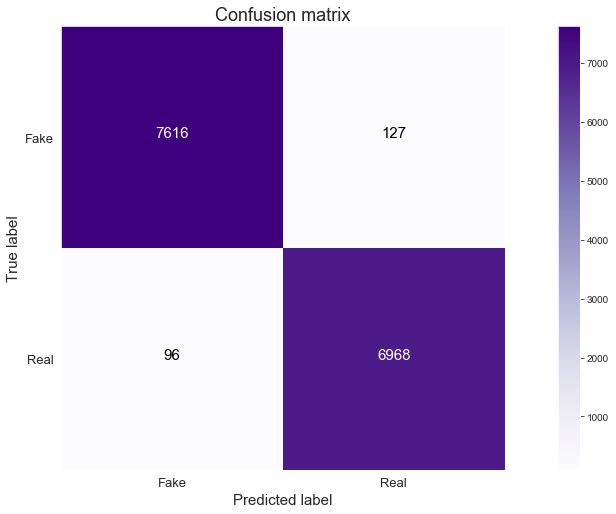

In [27]:
plt.figure(figsize=(15,7))
cm = metrics.confusion_matrix(y_test, lr_prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

----------------

Decision Tree Classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier
pipe = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), 
                 ('model', DecisionTreeClassifier(criterion= 'entropy', max_depth = 20, splitter='best', random_state=42))])

dt_model = pipe.fit(X_train, y_train)

dt_prediction = dt_model.predict(X_test)
print("Accuracy: {}%".format(round(accuracy_score(y_test, dt_prediction)*100,2)))

Accuracy: 99.65%


In [29]:
a = "WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a fiscal conservative on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS Face the Nation, drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense discretionary spending on programs that support education, scientific research, infrastructure, public health and environmental protection. The (Trump) administration has already been willing to say: Were going to increase non-defense discretionary spending ... by about 7 percent"
a = [a]
b = dt_model.predict(a)
print(b)

[ True]


In [30]:
a = "tunis reuters tunisia continue package painful economic policy prime minister youssef chahed said tuesday despite resistance labor union business association change raise tax put thousand work north african country pressure international monetary fund speed policy change help economy recover militant attack hurt vital tourism industry tunisia plan raise value added tax lay government worker part budget cut budget deficit government also proposed percent social security tax employee company federation company owner utica rejected proposal threatening shut company seek consensus go ahead reform needed revive economy retreat chahed told parliament start budget debate chahed also want freeze public sector hiring powerful union ugtt said accept branch education health needed recruitment beware anger tunisian ugtt situation continues rest party refuse share sacrifice ugtt head nourredine taboubi said tunisia praised democratic progress uprising toppled president zine el abidine ben ali successive government failed make change needed trim deficit create growth budget deficit fall percent gross domestic product percent expected tunisia hope raise gdp percent next year percent year"
a = [a]
b = dt_model.predict(a)
print(b)

[ True]


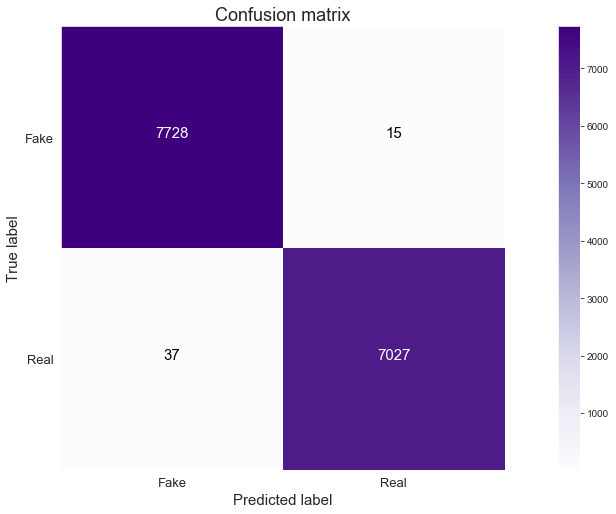

In [31]:
plt.figure(figsize=(15,7))
cm = metrics.confusion_matrix(y_test, dt_prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

------------------------

Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])
rf_model = pipe.fit(X_train, y_train)
rf_prediction = rf_model.predict(X_test)
print("Accuracy: {}%".format(round(accuracy_score(y_test, rf_prediction)*100,2)))

Accuracy: 98.92%


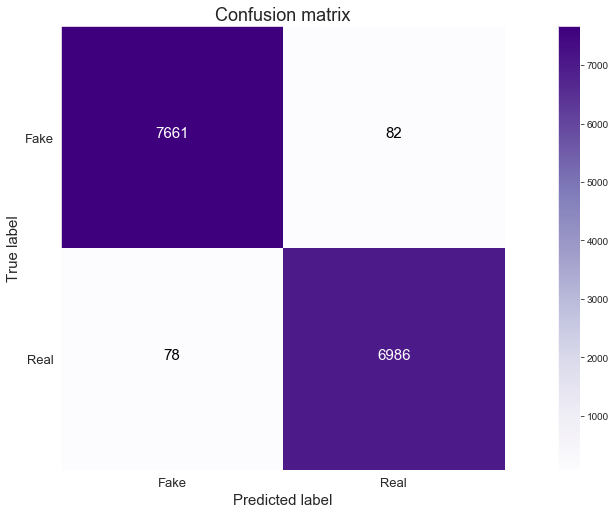

In [33]:
plt.figure(figsize=(15,7))
cm = metrics.confusion_matrix(y_test, rf_prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

------------------------

In [34]:
print("Logistic Regression Accuracy : {}%".format(round(accuracy_score(y_test, lr_prediction)*100,2)))
print("Decision Tree Accuracy         : {}%".format(round(accuracy_score(y_test, dt_prediction)*100,2)))
print("Random Forest Accuracy      : {}%".format(round(accuracy_score(y_test, rf_prediction)*100,2)))

Logistic Regression Accuracy : 98.49%
Decision Tree Accuracy         : 99.65%
Random Forest Accuracy      : 98.92%
